# Métodos e Modelos Avançados em Ciência de Dados

## Análise do comportamento dos Ensembles

Algoritmos de classificação:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB

Algoritmos de ensemble:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier

Dataset:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

In [242]:
# import das classes dos algoritmos de classificação
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# import da classe para normalização dos dados
from sklearn.preprocessing import StandardScaler

# import das classes dos algoritmos de ensemble
from sklearn.ensemble import VotingClassifier, BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, StackingClassifier

# import das metodologias de experientação
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

# import do datest
from sklearn.datasets import load_breast_cancer

# import das biblitecas para manipulação dos dados
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [243]:
# o dataset possui 30 características e a classe Diagnosis (0 = Malignant, 1 = Benign)

# carregando os dados do dataset
X, y = load_breast_cancer(return_X_y=True)

X.shape, y.shape

((569, 30), (569,))

In [244]:
# convertendo para um Dataframe e exibindo os primeiros registros
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [245]:
# seed para reprodução dos experimentos
seed = 30

# dividindo e atribuindo os dados de treino e teste (70% treino e 30% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=seed, 
    shuffle=True,
    stratify=y
)

# exibindo o resultado da divisão
print("(X_train) Conjunto de treinamento: ", X_train.shape)
print("(y_train) Rótulos do conjunto de treinamento: ", y_train.shape)
print("(X_test) Conjunto de teste: ", X_test.shape)
print("(y_test) Rótulos do conjunto de teste: ",y_test.shape)

(X_train) Conjunto de treinamento:  (398, 30)
(y_train) Rótulos do conjunto de treinamento:  (398,)
(X_test) Conjunto de teste:  (171, 30)
(y_test) Rótulos do conjunto de teste:  (171,)


In [246]:
# normalizando os dados de treino e teste
sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [247]:
# declarando e treinando os algoritmos de classificação

# DT (Decision Tree)
tree = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=3, random_state=seed) 
tree.fit(X_train_scaled, y_train)

# MLP (Multilayer Perceptron)
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=10000, random_state=seed) 
mlp.fit(X_train_scaled, y_train)

# KNN (K Nearest Neighbors)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# SVC (C-Support Vector Classification)
svc = SVC(kernel = 'rbf', random_state = seed)
svc.fit(X_train_scaled, y_train)

# GNB (Gaussian Naive Bayes)
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

# declarando os algoritmos para os testes dos ensembles compostos
estimators = [('DecisionTreeClassifier', tree), ('MLPClassifier', mlp), ('KNeighborsClassifier', knn), 
              ('SVC', svc), ('GaussianNB', gnb)]

In [248]:
# ensemble (Voting) composto por cinco algoritmos de classificação
voting_clf = VotingClassifier(
    estimators=estimators,
    voting='hard'
) 
voting_clf.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('DecisionTreeClassifier',
                              DecisionTreeClassifier(min_samples_leaf=3,
                                                     min_samples_split=5,
                                                     random_state=30)),
                             ('MLPClassifier',
                              MLPClassifier(hidden_layer_sizes=(10,),
                                            max_iter=10000, random_state=30)),
                             ('KNeighborsClassifier',
                              KNeighborsClassifier(n_neighbors=3)),
                             ('SVC', SVC(random_state=30)),
                             ('GaussianNB', GaussianNB())])

In [249]:
# ensemble (Bagging) 
bagging_clf = BaggingClassifier(estimator=mlp, n_estimators=30, random_state=seed) 
bagging_clf.fit(X_train_scaled, y_train)

BaggingClassifier(estimator=MLPClassifier(hidden_layer_sizes=(10,),
                                          max_iter=10000, random_state=30),
                  n_estimators=30, random_state=30)

In [250]:
# ensemble (Boosting) 
boosting_clf = AdaBoostClassifier(n_estimators=30, random_state=seed) 
boosting_clf.fit(X_train_scaled, y_train)

AdaBoostClassifier(n_estimators=30, random_state=30)

In [251]:
# ensemble (Random Forest) 
random_forest_clf = RandomForestClassifier(n_estimators=30, random_state=seed) 
random_forest_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=30, random_state=30)

In [252]:
# ensemble (Stacking) composto por cinco algoritmos de classificação + algoritmo de regressão logística como estimador final
stacking_clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=LogisticRegression()
)
stacking_clf.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('DecisionTreeClassifier',
                                DecisionTreeClassifier(min_samples_leaf=3,
                                                       min_samples_split=5,
                                                       random_state=30)),
                               ('MLPClassifier',
                                MLPClassifier(hidden_layer_sizes=(10,),
                                              max_iter=10000,
                                              random_state=30)),
                               ('KNeighborsClassifier',
                                KNeighborsClassifier(n_neighbors=3)),
                               ('SVC', SVC(random_state=30)),
                               ('GaussianNB', GaussianNB())],
                   final_estimator=LogisticRegression())

In [253]:
# Obtendo as predições e acurácia para o conjunto de teste

# Decision Tree
y_test_pred_tree = tree.predict(X_test_scaled)
tree_acc = accuracy_score(y_test, y_test_pred_tree)

# Multilayer Perceptron
y_test_pred_mlp = mlp.predict(X_test_scaled)
mlp_acc = accuracy_score(y_test, y_test_pred_mlp)

# K Nearest Neighbors
y_test_pred_knn = knn.predict(X_test_scaled)
knn_acc = accuracy_score(y_test, y_test_pred_knn)

# C-Support Vector Classification
y_test_pred_svc = svc.predict(X_test_scaled)
svc_acc = accuracy_score(y_test, y_test_pred_svc)

# Gaussian Naive Bayes
y_test_pred_gnb = gnb.predict(X_test_scaled)
gnb_acc = accuracy_score(y_test, y_test_pred_gnb)

# Voting
y_test_pred_voting = voting_clf.predict(X_test_scaled)
voting_acc = accuracy_score(y_test, y_test_pred_voting)

# Bagging
y_test_pred_bagging = bagging_clf.predict(X_test_scaled)
bagging_acc = accuracy_score(y_test, y_test_pred_bagging)

# Boosting
y_test_pred_boosting = boosting_clf.predict(X_test_scaled)
boosting_acc = accuracy_score(y_test, y_test_pred_boosting)

# Random Forest
y_test_pred_rf = random_forest_clf.predict(X_test_scaled)
rf_acc = accuracy_score(y_test, y_test_pred_rf)

# Stacking
y_test_pred_stacking = stacking_clf.predict(X_test_scaled)
stacking_acc = accuracy_score(y_test, y_test_pred_stacking)

print("Acurácia dos algoritmos: \n")
print("Decision Tree: ", tree_acc.round(3))
print("Multilayer Perceptron: ", mlp_acc.round(3))
print("K Nearest Neighbors: ", knn_acc.round(3))
print("C-Support Vector Classification: ", svc_acc.round(3))
print("Gaussian Naive Bayes: ", gnb_acc.round(3))
print("Voting: ", voting_acc.round(3))
print("Bagging: ", bagging_acc.round(3))
print("Boosting: ", boosting_acc.round(3))
print("Random Forest: ",  rf_acc.round(3))
print("Stacking: ", stacking_acc.round(3))

Acurácia dos algoritmos: 

Decision Tree:  0.93
Multilayer Perceptron:  0.977
K Nearest Neighbors:  0.959
C-Support Vector Classification:  0.965
Gaussian Naive Bayes:  0.918
Voting:  0.965
Bagging:  0.982
Boosting:  0.947
Random Forest:  0.947
Stacking:  0.977


In [254]:
# acurácia dos algoritmos com validação cruzada
print("Acurácia dos algoritmos com validação cruzada: \n")

clfs = [tree, mlp, knn, svc, gnb, voting_clf, bagging_clf, boosting_clf, random_forest_clf, stacking_clf]
labels = ['Decision Tree', 'Multilayer Perceptron', 'K Nearest Neighbors', 'C-Support Vector Classification', 
          'Gaussian Naive Bayes', 'Voting', 'Bagging', 'Boosting', 'Ramdon Forest', 'Stacking']
for clf, label in zip(clfs, labels):
    scores = cross_val_score(clf, X_test_scaled, y_test, scoring='accuracy', cv=5)
    print("Acurácia: %0.3f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Acurácia dos algoritmos com validação cruzada: 

Acurácia: 0.883 (+/- 0.04) [Decision Tree]
Acurácia: 0.971 (+/- 0.03) [Multilayer Perceptron]
Acurácia: 0.918 (+/- 0.05) [K Nearest Neighbors]
Acurácia: 0.942 (+/- 0.04) [C-Support Vector Classification]
Acurácia: 0.942 (+/- 0.06) [Gaussian Naive Bayes]
Acurácia: 0.936 (+/- 0.05) [Voting]
Acurácia: 0.965 (+/- 0.02) [Bagging]
Acurácia: 0.907 (+/- 0.03) [Boosting]
Acurácia: 0.930 (+/- 0.05) [Ramdon Forest]
Acurácia: 0.948 (+/- 0.05) [Stacking]


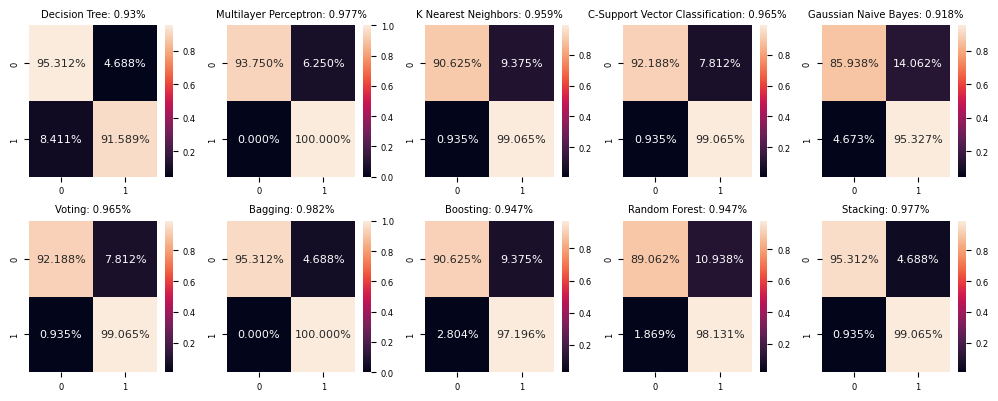

In [255]:
# exibindo os gráficos com a matriz de confusão de teste para cada algoritmo
def plot_heatmap(y, y_pred, title):
    cm = confusion_matrix(y, y_pred, normalize="true")
    plot = sns.heatmap(cm, annot=True, fmt=".3%", annot_kws={'fontsize': 8})
    plot.set_title(title + ": " + str(accuracy_score(y, y_pred).round(3)) + "%")
    
plt.figure(figsize=(10, 4))

plt.subplot(2, 5, 1)
plot_heatmap(y_test, y_test_pred_tree, 'Decision Tree')

plt.subplot(2, 5, 2)
plot_heatmap(y_test, y_test_pred_mlp, 'Multilayer Perceptron')

plt.subplot(2, 5, 3)
plot_heatmap(y_test, y_test_pred_knn, 'K Nearest Neighbors')

plt.subplot(2, 5, 4)
plot_heatmap(y_test, y_test_pred_svc, 'C-Support Vector Classification')

plt.subplot(2, 5, 5)
plot_heatmap(y_test, y_test_pred_gnb, 'Gaussian Naive Bayes')

plt.subplot(2, 5, 6)
plot_heatmap(y_test, y_test_pred_voting, 'Voting')

plt.subplot(2, 5, 7)
plot_heatmap(y_test, y_test_pred_bagging, 'Bagging')

plt.subplot(2, 5, 8)
plot_heatmap(y_test, y_test_pred_boosting, 'Boosting')

plt.subplot(2, 5, 9)
plot_heatmap(y_test, y_test_pred_rf, 'Random Forest')

plt.subplot(2, 5, 10)
plot_heatmap(y_test, y_test_pred_stacking, 'Stacking')

plt.tight_layout() 
plt.show()

### Considerações finais

A escolha do dataset breast_cancer se deve a familiaridade obtida através de trabalhos realizados anteriormente.

Foram avaliados 5 algoritmos de classificação (Decision Tree, Multilayer Perceptron, K Nearest Neighbors, C-Support Vector Classification e Gaussian Naive Bayes) e 5 ensembles (Voting, Bagging, AdaBoost, Ramdon Forest e Stacking) da bibliotca scikit-learn.

Para cada algoritmo de classificação foram executados alguns testes alterando seus hiperparâmetros com o intuito de buscar o melhor desempenho de cada um deles.

Para cada ensemble também foram executados testes com diferentes algoritmos base, afim de avaliar seu desempenho.

O desempenho foi medido através da acurácia, onde pode-se observar que o ensemble Bagging, utilizando o algoritmo Multilayer Perceptron como base, teve o melhor resultado.

Também foi avaliado a acurácia dos algoritmos utilizando validação cruzada, onde o melhor resultado também obteve-se através da combinação Bagging + Multilayer Perceptron.

Por fim, para cada algoritmo foi exibido a matriz de confusão a partir dos dados de teste.

De maneira geral, pode-se observar um bom resultado em todos os algoritmos avaliados nesta análise, assim como o alto desempenho que os ensembles podem nos proporciar em conjunto com algoritmos e hiperparâmetros corretos.

Como análise futura pretende-se utilizar o GridSearchCV ou outras técnicas disponíveis para ajustar de forma automatizada e dinâmica os melhores hiperparâmetros para cada algoritmo.
